In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/titanic.csv")

In [3]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [12]:
duplicated_rows = df[df.duplicated()]
print("Number of duplicated rows:", len(duplicated_rows))

Number of duplicated rows: 0


In [13]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [14]:
df.drop(columns = 'Name' , inplace= True)

In [15]:
df.head(5)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

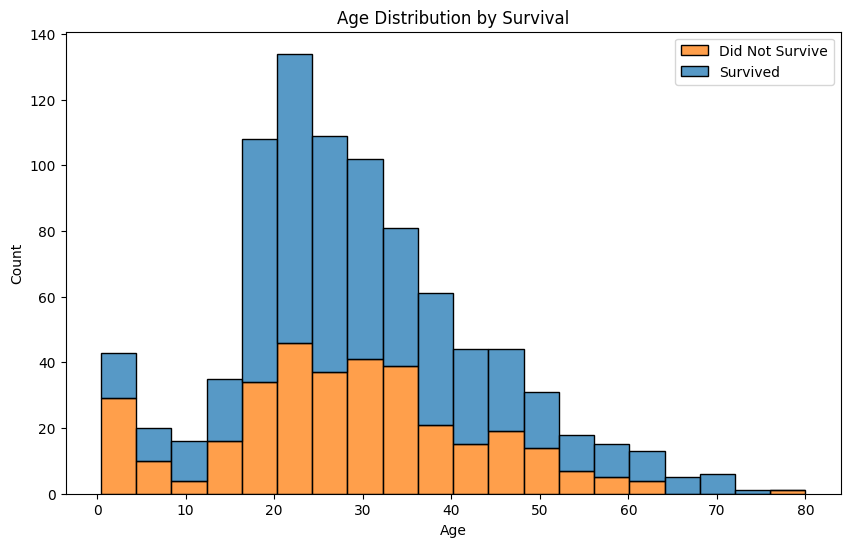

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

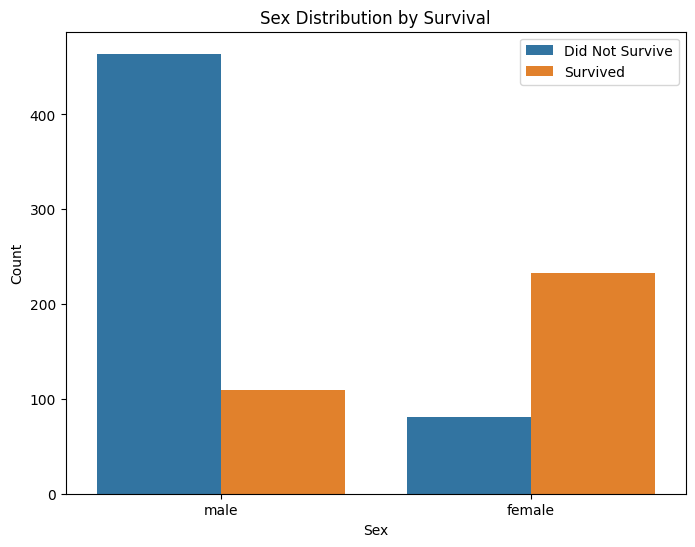

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Sex Distribution by Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

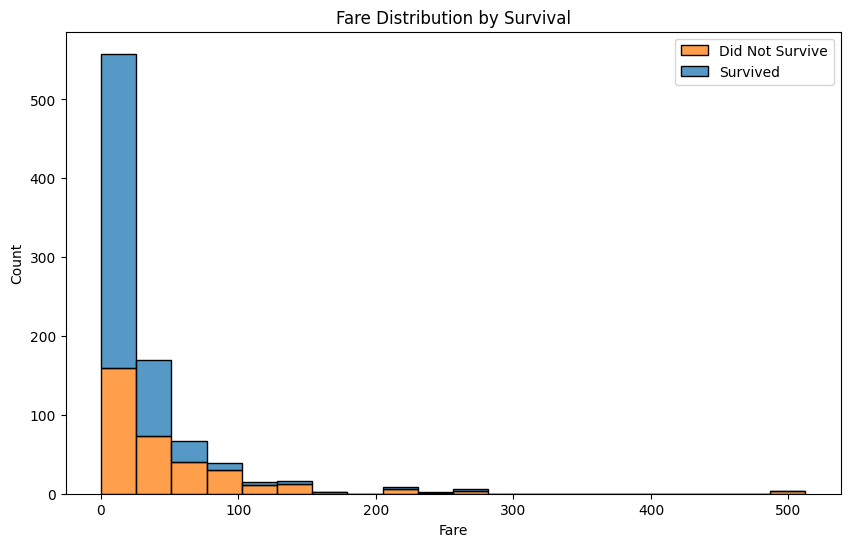

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=20)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

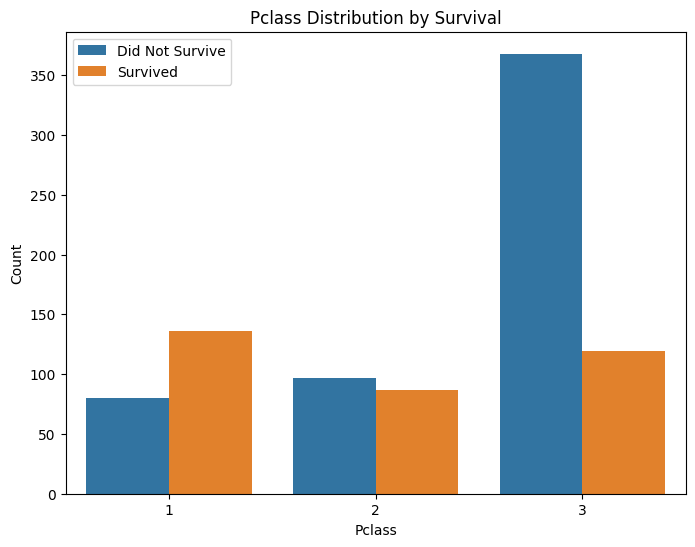

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Pclass Distribution by Survival")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(["Did Not Survive", "Survived"])
plt.show()

<ipython-input-24-0d5ca40831be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


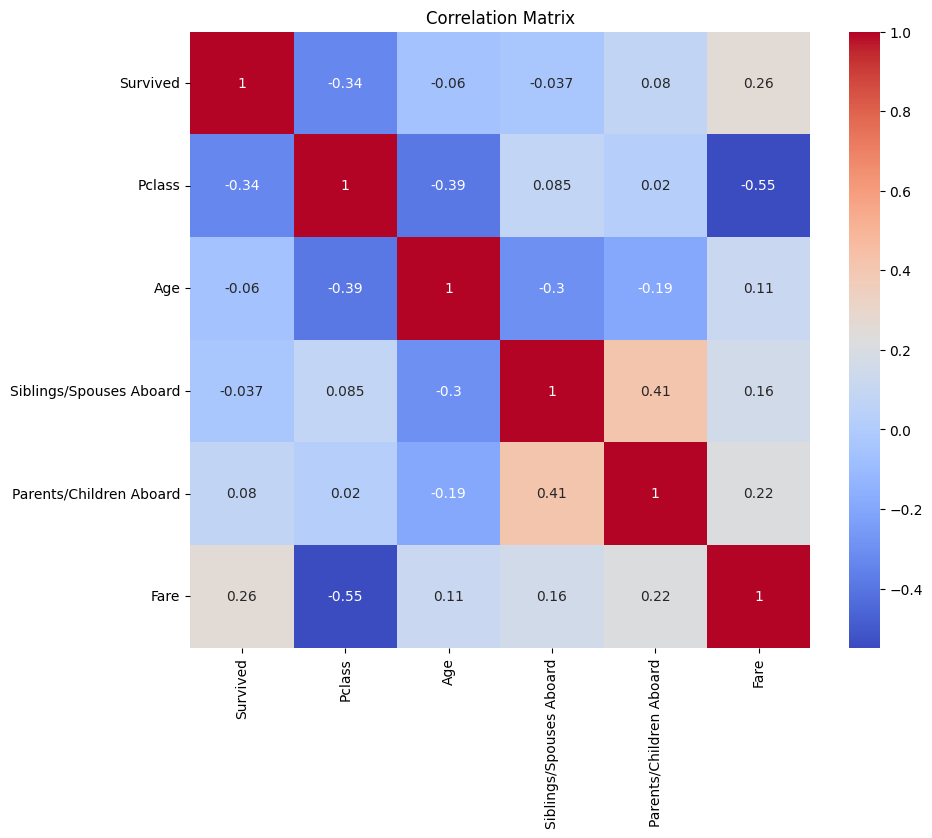

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [26]:
data = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [27]:
data.head(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [28]:
X = data.drop('Survived',axis=1)
Y = data['Survived']

In [29]:
X

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
882,2,27.0,0,0,13.0000,1
883,1,19.0,0,0,30.0000,0
884,3,7.0,1,2,23.4500,0
885,1,26.0,0,0,30.0000,1


In [30]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
X_train.shape , X_test.shape , X.shape

((709, 6), (178, 6), (887, 6))

In [33]:
scaler = StandardScaler()
x_trained_scaled = scaler.fit_transform(X_train)
x_tested_scaled = scaler.transform(X_test)

In [34]:
model = RandomForestClassifier(n_estimators=100 , random_state = 42)
model.fit(x_trained_scaled , y_train)
y_pred = model.predict(x_tested_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy:{accuracy:.2f}")

accuracy:0.78


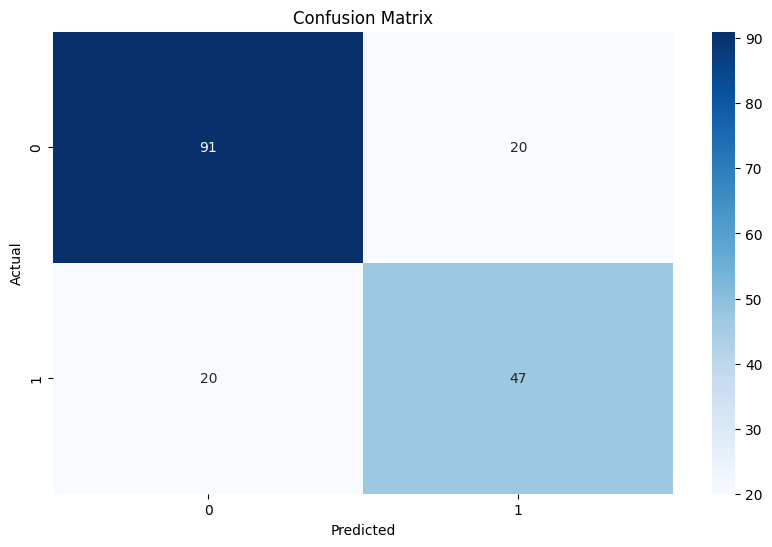

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot= True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7809


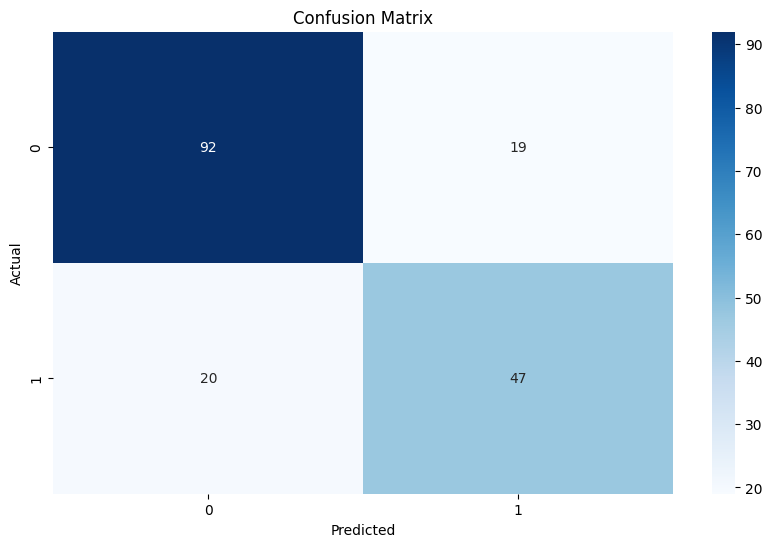

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_trained_scaled, y_train)
y_pred = knn_classifier.predict(x_tested_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot= True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7472


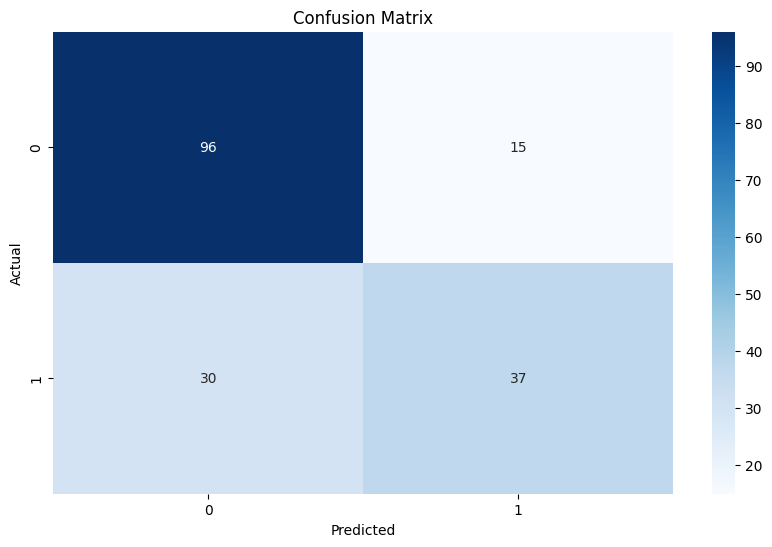

In [53]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(x_trained_scaled, y_train)
y_pred = logreg_classifier.predict(x_tested_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot= True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(x_trained_scaled, y_train)
y_pred = linear_reg.predict(x_tested_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.1664
R-squared: 0.2909
